In [394]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers

In [395]:
def padronizar_normal(matriz_X):
    for i in range(np.shape(matriz_X)[1]):
        matriz_X[:,i] = (matriz_X[:,i] - np.mean(matriz_X[:,i]))/np.std(matriz_X[:,i]) # X menos media/desvio padrao

    return matriz_X

def padronizar(X):
    min_values = X.min(axis=0)
    max_values = X.max(axis=0)
    X = (X - min_values) / (max_values - min_values)
    return X


In [396]:
data = pd.read_csv('creditcard_reduced.csv')


In [397]:
data = data.drop(['Time'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)
print(data['Class'].value_counts())
# Eu possuo 284315 valores de classe 0 e 492 valores de classe 1. Deixe os valores iguais
data = data.sample(frac=1)
fraude = data.loc[data['Class'] == 1]
nao_fraude = data.loc[data['Class'] == 0][:492]
normal_distributed_data = pd.concat([fraude, nao_fraude])
print(normal_distributed_data['Class'].value_counts())


Class
0    10000
1      492
Name: count, dtype: int64
Class
1    492
0    492
Name: count, dtype: int64


In [398]:
normal_distributed_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
180,-1.125092,3.682876,-6.556168,4.016731,-0.425571,-2.031210,-2.650137,1.131249,-2.946890,-4.816401,...,1.185580,1.348156,-0.053686,0.284122,-1.174469,-0.087832,0.718790,0.676216,0.76,1
413,-3.519030,4.140867,-3.628202,5.505672,-4.057463,-0.905945,-6.652031,2.634524,-4.679402,-6.546242,...,1.582556,0.778710,-0.135707,-0.004278,0.032706,0.362014,0.900925,0.554897,9.13,1
275,-1.108478,3.448953,-6.216972,3.021052,-0.529901,-2.551375,-2.001743,1.092432,-0.836098,-4.095649,...,0.825951,1.144170,0.208559,-0.295497,-0.690232,-0.364749,0.229327,0.208830,18.00,1
259,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,-1.393306,-3.505790,...,0.402730,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,0.76,1
337,-0.099724,2.795414,-6.423856,3.247513,-1.632290,-2.766665,-2.312223,0.961014,-1.896001,-4.919348,...,0.647714,0.126576,0.203953,0.008495,-0.174501,0.575295,0.152876,-0.098173,94.82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,2.073956,0.099751,-1.277709,0.357874,0.078142,-1.343093,0.350942,-0.484323,0.391136,-0.024465,...,0.261360,0.988275,-0.015441,0.120745,0.312792,-0.115753,-0.010769,-0.055603,1.79,0
1959,-2.362177,2.770093,-1.549977,-1.959705,1.157837,-1.263685,2.126036,-0.842176,2.087371,3.918988,...,-0.265990,0.842096,-0.314695,-0.397950,0.129139,0.005239,0.601258,-0.245861,7.70,0
4697,1.273745,0.278094,-0.075297,0.446751,0.215297,-0.125249,-0.017577,-0.004897,0.103271,-0.321924,...,-0.316963,-0.878888,0.057085,-0.810224,0.251885,0.176653,-0.008267,0.018517,0.99,0
1923,-0.126130,1.232076,-0.884815,-0.070075,0.282536,-1.448395,0.610859,0.093292,-0.100949,-1.048987,...,0.352064,0.964364,-0.093440,-0.034373,-0.364831,-0.165229,-0.133282,0.029379,8.33,0


In [399]:
X = np.array(normal_distributed_data.drop('Class', axis=1))
Y = np.array(normal_distributed_data['Class'])
RANDOM_STATE = 2
BATCH_SIZE = 32

# Normalizando os dados
X = padronizar_normal(X)

In [400]:
# Separando em dados de treino, teste e validação
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, test_size=0.2, random_state=RANDOM_STATE)

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

X_train: (629, 29)
Y_train: (629,)
X_val: (158, 29)
Y_val: (158,)


In [401]:
# Encontrando o número de neurônios na camada escondida
num_neuronios = (X_train.shape[0] - 10)/(10*(X_train.shape[1] + 2))
num_neuronios

1.9967741935483871

In [402]:
# Criando a rede neural
model = Sequential()
# Adicionando neurônios em uma camada oculta
model.add(Dense(2, input_dim=29, kernel_initializer='normal', activation='relu')) #quantidade de neuronios na camada escondida, nº de features

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #camada de saída

# adicionando a taxa de aprendizado

# Compilando o modelo
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

c:\Users\bergs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [403]:
#Treinando a rede neural
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=150, batch_size=BATCH_SIZE, verbose=1)

Epoch 1/150


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4095 - loss: 0.6936 - val_accuracy: 0.6139 - val_loss: 0.6909
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6804 - loss: 0.6871 - val_accuracy: 0.7722 - val_loss: 0.6850
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8126 - loss: 0.6787 - val_accuracy: 0.8671 - val_loss: 0.6743
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8438 - loss: 0.6660 - val_accuracy: 0.8734 - val_loss: 0.6572
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8862 - loss: 0.6450 - val_accuracy: 0.8608 - val_loss: 0.6341
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8489 - loss: 0.6184 - val_accuracy: 0.8671 - val_loss: 0.6069
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8866 - loss: 0.5819 - val_accuracy: 0.8734 - val_loss: 0.5762
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8640 - loss: 0.5573 - val_accuracy: 0.8734 - val_loss: 0.

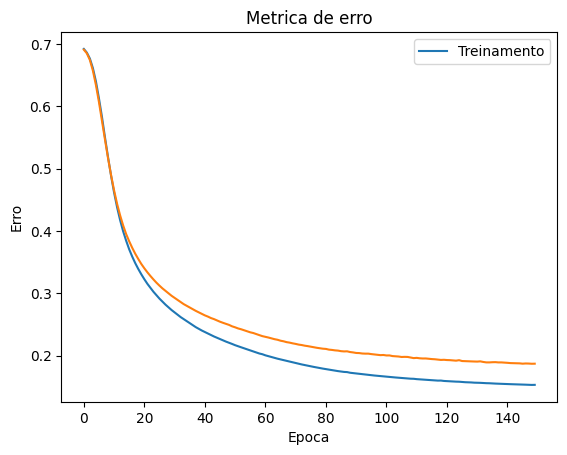

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

--> Acuracia (treino): 0.9380
--> Acuracia (validacao): 0.9241
--> acc_train - acc_val = 0.0139


{0.0: 335, 1.0: 294}

In [404]:
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

# Obtendo a acuracia usando accuracy_score()
pred = np.round(model.predict(X_train))
acc_train = accuracy_score(Y_train, pred)

pred_val = np.round(model.predict(X_val))
acc_val = accuracy_score(Y_val, pred_val)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
pred_np = np.array(pred)
# encontrando os valores unicos de pred_np
unique, counts = np.unique(pred_np, return_counts=True)
dict(zip(unique, counts))


In [405]:
#descobrindo quantos valores unicos existem em pred_val
valores, contagens = np.unique(pred_val, return_counts=True)

# Combina os valores únicos e as contagens correspondentes
resultados = np.column_stack((valores, contagens))

resultados


array([[ 0., 88.],
       [ 1., 70.]])

In [406]:
valores, contagens = np.unique(Y_val, return_counts=True)
resultados = np.column_stack((valores, contagens))
resultados

array([[ 0, 78],
       [ 1, 80]], dtype=int64)

In [407]:
#descobrindo quantos valores unicos existem em pred
valores, contagens = np.unique(pred, return_counts=True)

# Combina os valores únicos e as contagens correspondentes
resultados = np.column_stack((valores, contagens))
resultados

array([[  0., 335.],
       [  1., 294.]])

In [408]:
valores, contagens = np.unique(Y_train, return_counts=True)
resultados = np.column_stack((valores, contagens))
resultados

array([[  0, 312],
       [  1, 317]], dtype=int64)

In [409]:
model.evaluate(X_train, Y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9392 - loss: 0.1539 


[0.1528591811656952, 0.9379968047142029]

In [410]:
model.evaluate(X_val, Y_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 143us/step - accuracy: 0.9400 - loss: 0.1540


[0.18728254735469818, 0.9240506291389465]